In [2]:
%matplotlib inline

In [3]:
import scipy.io as sio
import pandas as pd
import numpy as np
import h5py
from IPython.display import Image, display
from datetime import datetime, timedelta

In [4]:
imdb = sio.loadmat("/mnt/20A0293CA02919B4/code/project/imdb_crop/imdb.mat")['imdb']
wiki = sio.loadmat("/mnt/20A0293CA02919B4/code/project/wiki_crop/wiki.mat")['wiki']

In [5]:
imdb.dtype.names

('dob',
 'photo_taken',
 'full_path',
 'gender',
 'name',
 'face_location',
 'face_score',
 'second_face_score',
 'celeb_names',
 'celeb_id')

In [6]:
datas = []
columns = ['celeb_id', 'dob', 'face_score', 'full_path', 'gender', 'name', 'photo_taken', 'second_face_score']
# columns = sorted(imdb.dtype.names)
for c in columns:
    print(c, imdb[c][0][0].T.shape)
    datas.append(imdb[c][0][0].T)

celeb_id (460723, 1)
dob (460723, 1)
face_score (460723, 1)
full_path (460723, 1)
gender (460723, 1)
name (460723, 1)
photo_taken (460723, 1)
second_face_score (460723, 1)


In [7]:
def fix_strings(s):
    if len(s) == 1:
        return s[0]
    return ""
def fix_dob(d):
    try:
        return datetime.fromordinal(d) + timedelta(days=d%1) - timedelta(days = 366)
    except:
        return -1

In [8]:
df = pd.DataFrame(np.hstack(datas), columns=columns)
df['full_path'] = df['full_path'].apply(fix_strings)
df['name'] = df['name'].apply(fix_strings)
df['photo_taken'] = pd.to_datetime(df['photo_taken'])
df['dob_fixed'] = df['dob'].apply(fix_dob)

In [9]:
df.head()

,celeb_id,dob,face_score,full_path,gender,name,photo_taken,second_face_score,dob_fixed
0,6488,693726,1.45969,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1,Fred Astaire,1970-01-01 00:00:00.000001968,1.11897,1899-05-10 00:00:00
1,6488,693726,2.5432,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1,Fred Astaire,1970-01-01 00:00:00.000001970,1.85201,1899-05-10 00:00:00
2,6488,693726,3.45558,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1,Fred Astaire,1970-01-01 00:00:00.000001968,2.98566,1899-05-10 00:00:00
3,6488,693726,1.87212,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1,Fred Astaire,1970-01-01 00:00:00.000001968,NaN,1899-05-10 00:00:00
4,6488,693726,1.15877,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1,Fred Astaire,1970-01-01 00:00:00.000001968,NaN,1899-05-10 00:00:00


In [15]:
def show_index_wiki(idx):
#     print(df.iloc[idx])
    return Image("/mnt/20A0293CA02919B4/code/project/wiki_crop/{0}".format(df.iloc[idx].full_path))

def show_index_imdb(idx):
#     print(df.iloc[idx])
    return Image("/mnt/20A0293CA02919B4/code/project/imdb_crop/{0}".format(df.iloc[idx].full_path))

In [16]:
pf = df.groupby(df.name).size().reset_index(name='count').sort_values('count')

In [17]:
len(pf[pf['count'] > 50])

2215

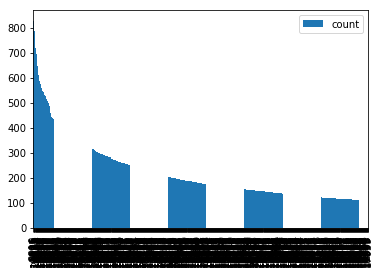

In [18]:
pf.sort_values('count', ascending=False).head(1000).plot(kind='bar')

(194242, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.10686
full_path            03/nm0405103_rm1003861504_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                         0.980447
dob_fixed                                      1990-11-24 00:00:00
Name: 194242, dtype: object)


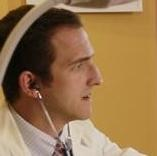

(194243, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.63282
full_path            03/nm0405103_rm1007403008_1990-11-24_2014.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002014
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194243, dtype: object)


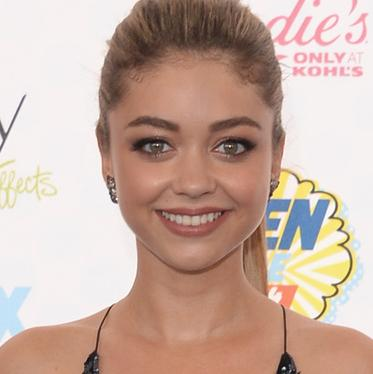

(194244, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.49493
full_path            03/nm0405103_rm1011461888_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194244, dtype: object)


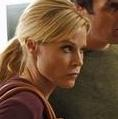

(194245, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1028829952_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194245, dtype: object)


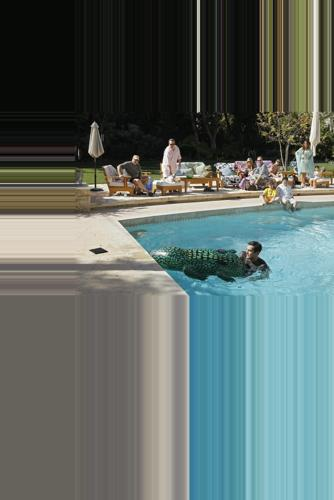

(194246, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.11291
full_path            03/nm0405103_rm1029997824_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.07331
dob_fixed                                      1990-11-24 00:00:00
Name: 194246, dtype: object)


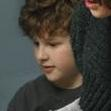

(194247, celeb_id                                                    17210
dob                                                        727161
face_score                                                4.91288
full_path            03/nm0405103_rm104135680_1990-11-24_2015.jpg
gender                                                          0
name                                                 Sarah Hyland
photo_taken                         1970-01-01 00:00:00.000002015
second_face_score                                             NaN
dob_fixed                                     1990-11-24 00:00:00
Name: 194247, dtype: object)


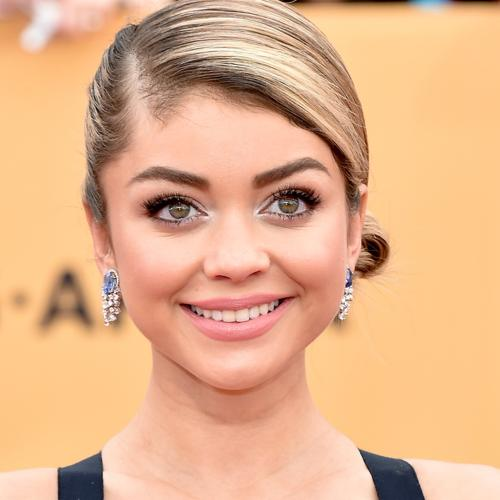

(194248, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.67047
full_path            03/nm0405103_rm1057335552_1990-11-24_2012.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002012
second_face_score                                          3.33042
dob_fixed                                      1990-11-24 00:00:00
Name: 194248, dtype: object)


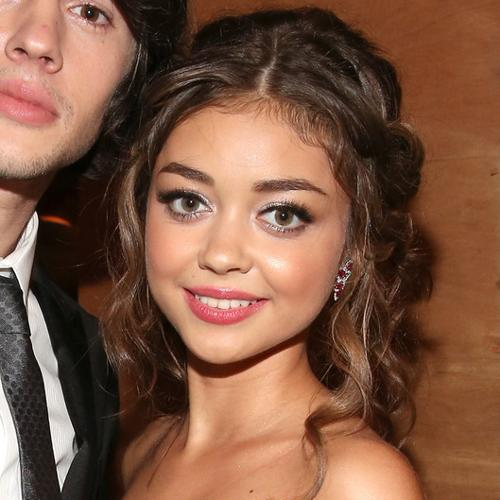

(194249, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.81101
full_path            03/nm0405103_rm1121238784_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                         0.917857
dob_fixed                                      1990-11-24 00:00:00
Name: 194249, dtype: object)


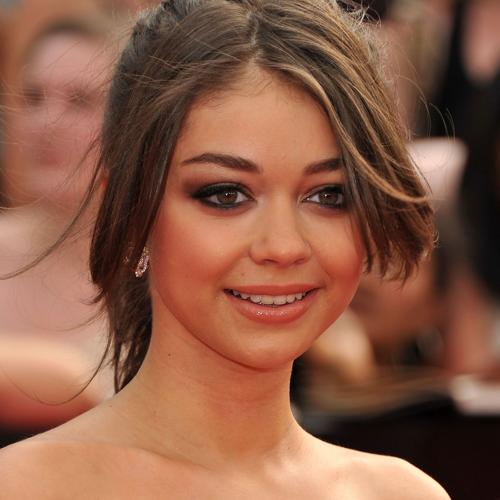

(194250, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.27547
full_path            03/nm0405103_rm1121374976_1990-11-24_2013.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002013
second_face_score                                          2.67459
dob_fixed                                      1990-11-24 00:00:00
Name: 194250, dtype: object)


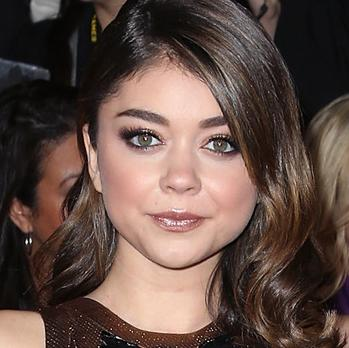

(194251, celeb_id                                                    17210
dob                                                        727161
face_score                                                2.62432
full_path            03/nm0405103_rm114669056_1990-11-24_2009.jpg
gender                                                          0
name                                                 Sarah Hyland
photo_taken                         1970-01-01 00:00:00.000002009
second_face_score                                             NaN
dob_fixed                                     1990-11-24 00:00:00
Name: 194251, dtype: object)


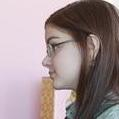

(194252, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.60235
full_path            03/nm0405103_rm1173472768_1990-11-24_2014.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002014
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194252, dtype: object)


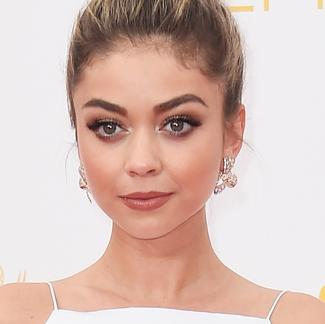

(194253, celeb_id                                                     17210
dob                                                         727161
face_score                                                 0.98568
full_path            03/nm0405103_rm1174008064_1990-11-24_2015.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002015
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194253, dtype: object)


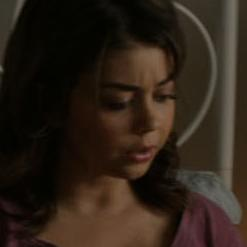

(194254, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.90782
full_path            03/nm0405103_rm1255592704_1990-11-24_2013.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002013
second_face_score                                          1.04435
dob_fixed                                      1990-11-24 00:00:00
Name: 194254, dtype: object)


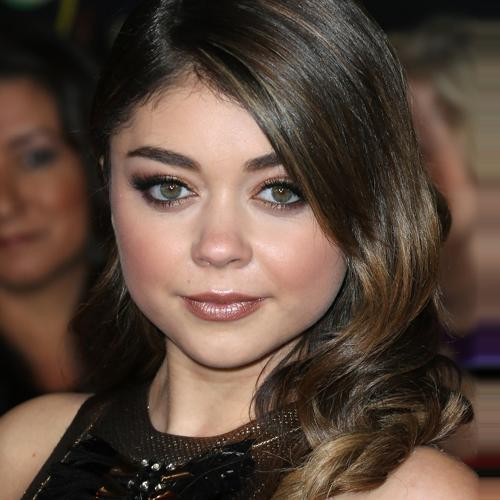

(194255, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.72141
full_path            03/nm0405103_rm1274671360_1990-11-24_2015.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002015
second_face_score                                          1.46286
dob_fixed                                      1990-11-24 00:00:00
Name: 194255, dtype: object)


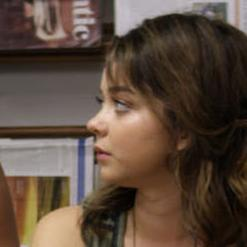

(194256, celeb_id                                                    17210
dob                                                        727161
face_score                                                4.79678
full_path            03/nm0405103_rm130663936_1990-11-24_2014.jpg
gender                                                          0
name                                                 Sarah Hyland
photo_taken                         1970-01-01 00:00:00.000002014
second_face_score                                         3.47507
dob_fixed                                     1990-11-24 00:00:00
Name: 194256, dtype: object)


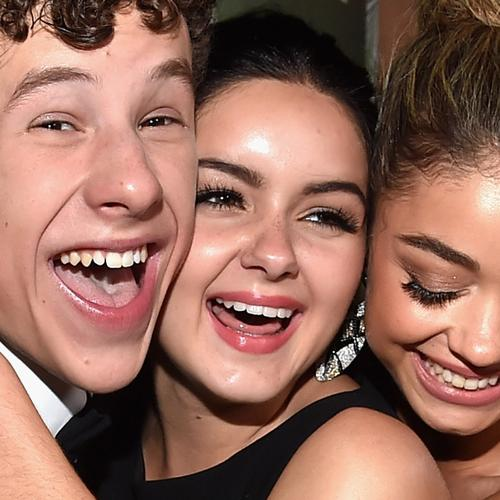

(194257, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.14113
full_path            03/nm0405103_rm1336979456_1990-11-24_2004.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002004
second_face_score                                         0.935417
dob_fixed                                      1990-11-24 00:00:00
Name: 194257, dtype: object)


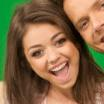

(194258, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.77011
full_path            03/nm0405103_rm1370075648_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                           1.3115
dob_fixed                                      1990-11-24 00:00:00
Name: 194258, dtype: object)


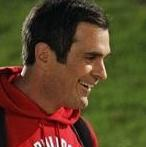

(194259, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.75211
full_path            03/nm0405103_rm1374614528_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194259, dtype: object)


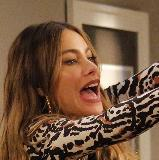

(194260, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.08141
full_path            03/nm0405103_rm1391391744_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194260, dtype: object)


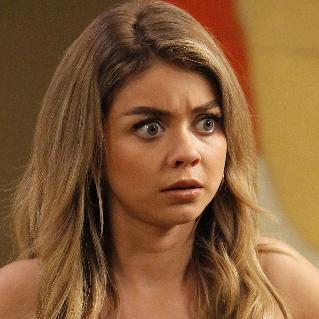

(194261, celeb_id                                                     17210
dob                                                         727161
face_score                                                  2.9474
full_path            03/nm0405103_rm1408168960_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.09681
dob_fixed                                      1990-11-24 00:00:00
Name: 194261, dtype: object)


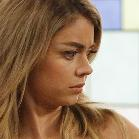

(194262, celeb_id                                                    17210
dob                                                        727161
face_score                                                2.38899
full_path            03/nm0405103_rm142194176_1990-11-24_2011.jpg
gender                                                          0
name                                                 Sarah Hyland
photo_taken                         1970-01-01 00:00:00.000002011
second_face_score                                        0.877914
dob_fixed                                     1990-11-24 00:00:00
Name: 194262, dtype: object)


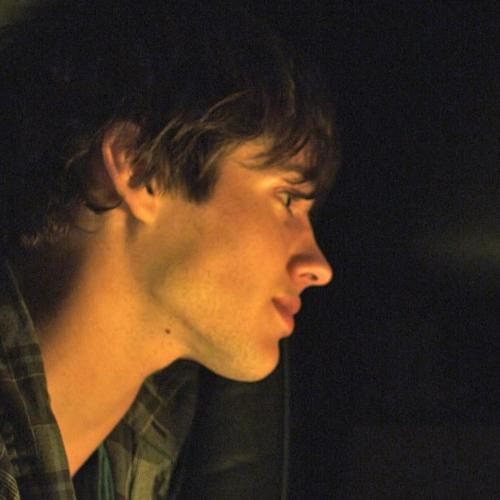

(194263, celeb_id                                                     17210
dob                                                         727161
face_score                                                 6.26965
full_path            03/nm0405103_rm1475462656_1990-11-24_2014.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002014
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194263, dtype: object)


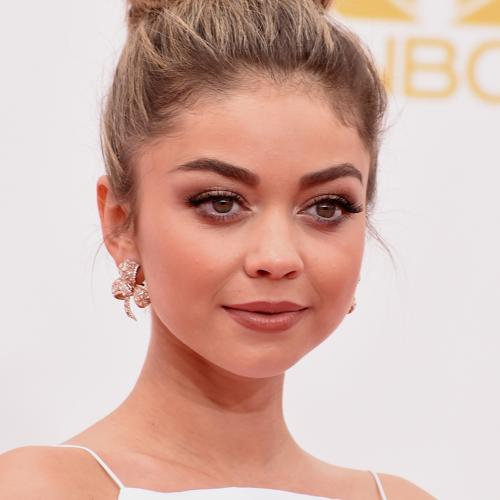

(194264, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.26937
full_path            03/nm0405103_rm1480982272_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                           1.8947
dob_fixed                                      1990-11-24 00:00:00
Name: 194264, dtype: object)


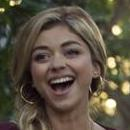

(194265, celeb_id                                                     17210
dob                                                         727161
face_score                                                 0.86842
full_path            03/nm0405103_rm1497759488_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194265, dtype: object)


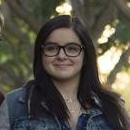

(194266, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.51332
full_path            03/nm0405103_rm1506838272_1990-11-24_2010.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002010
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194266, dtype: object)


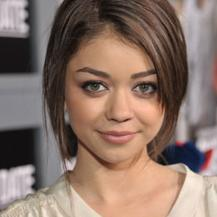

(194267, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1514536704_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194267, dtype: object)


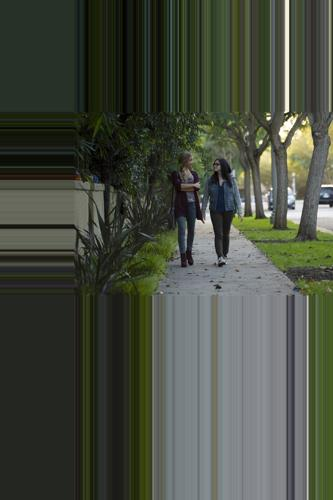

(194268, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.07883
full_path            03/nm0405103_rm1521070592_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.85026
dob_fixed                                      1990-11-24 00:00:00
Name: 194268, dtype: object)


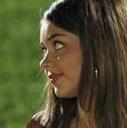

(194269, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1531313920_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194269, dtype: object)


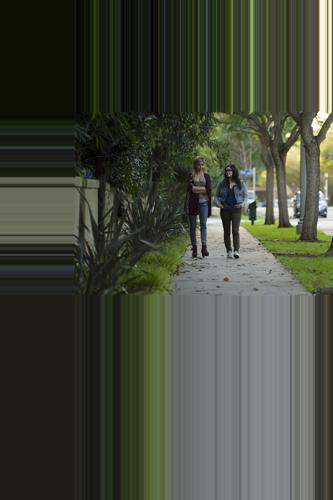

(194270, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1536146688_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194270, dtype: object)


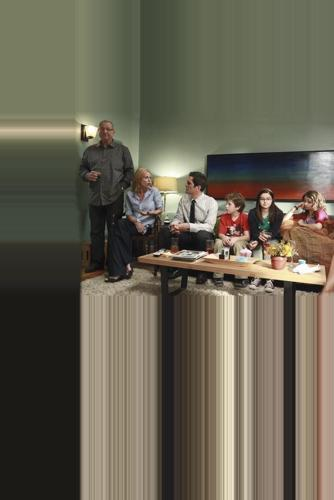

(194271, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.13723
full_path            03/nm0405103_rm1548091136_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                           1.8636
dob_fixed                                      1990-11-24 00:00:00
Name: 194271, dtype: object)


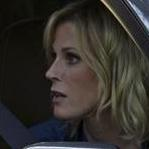

(194272, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1552923904_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194272, dtype: object)


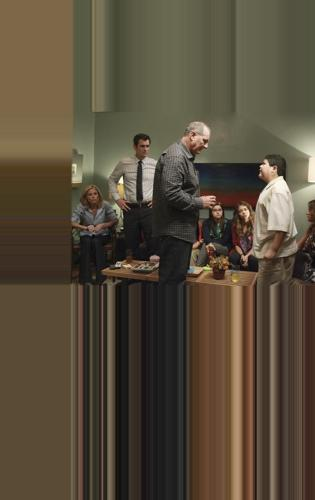

(194273, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.06097
full_path            03/nm0405103_rm1559273728_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          3.04683
dob_fixed                                      1990-11-24 00:00:00
Name: 194273, dtype: object)


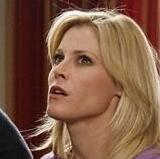

(194274, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.89157
full_path            03/nm0405103_rm1575941120_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                         0.987671
dob_fixed                                      1990-11-24 00:00:00
Name: 194274, dtype: object)


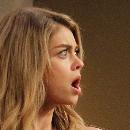

(194275, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.08548
full_path            03/nm0405103_rm1576050944_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          4.18732
dob_fixed                                      1990-11-24 00:00:00
Name: 194275, dtype: object)


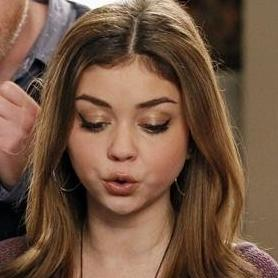

(194276, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.04866
full_path            03/nm0405103_rm1588179456_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194276, dtype: object)


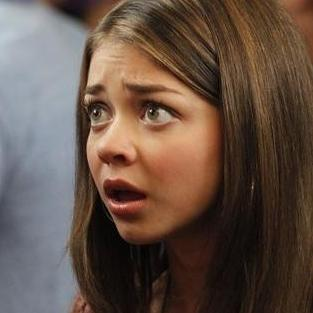

(194277, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.72393
full_path            03/nm0405103_rm1592718336_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.05408
dob_fixed                                      1990-11-24 00:00:00
Name: 194277, dtype: object)


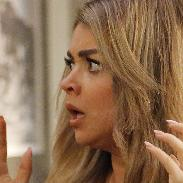

(194278, celeb_id                                                     17210
dob                                                         727161
face_score                                                0.973256
full_path            03/nm0405103_rm1609495552_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194278, dtype: object)


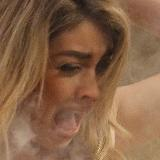

(194279, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.89643
full_path            03/nm0405103_rm1636797696_1990-11-24_2010.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002010
second_face_score                                          2.71332
dob_fixed                                      1990-11-24 00:00:00
Name: 194279, dtype: object)


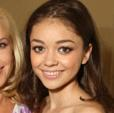

(194280, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.83864
full_path            03/nm0405103_rm1643380224_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          3.25437
dob_fixed                                      1990-11-24 00:00:00
Name: 194280, dtype: object)


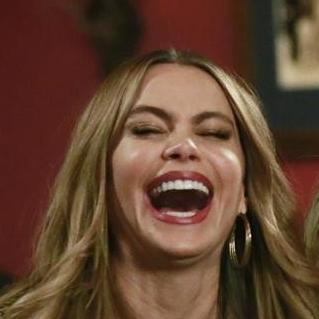

(194281, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.03278
full_path            03/nm0405103_rm1643770112_1990-11-24_2015.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002015
second_face_score                                           2.7078
dob_fixed                                      1990-11-24 00:00:00
Name: 194281, dtype: object)


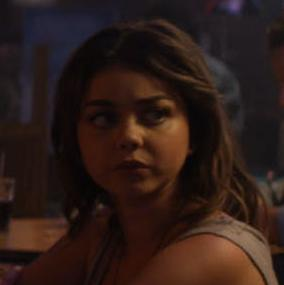

(194282, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.76469
full_path            03/nm0405103_rm1679003136_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.77763
dob_fixed                                      1990-11-24 00:00:00
Name: 194282, dtype: object)


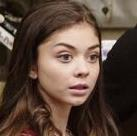

(194283, celeb_id                                                   17210
dob                                                       727161
face_score                                               2.12725
full_path            03/nm0405103_rm16813312_1990-11-24_2009.jpg
gender                                                         0
name                                                Sarah Hyland
photo_taken                        1970-01-01 00:00:00.000002009
second_face_score                                        1.06786
dob_fixed                                    1990-11-24 00:00:00
Name: 194283, dtype: object)


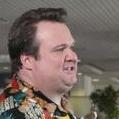

(194284, celeb_id                                                     17210
dob                                                         727161
face_score                                                 6.09153
full_path            03/nm0405103_rm1685306880_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                         0.758577
dob_fixed                                      1990-11-24 00:00:00
Name: 194284, dtype: object)


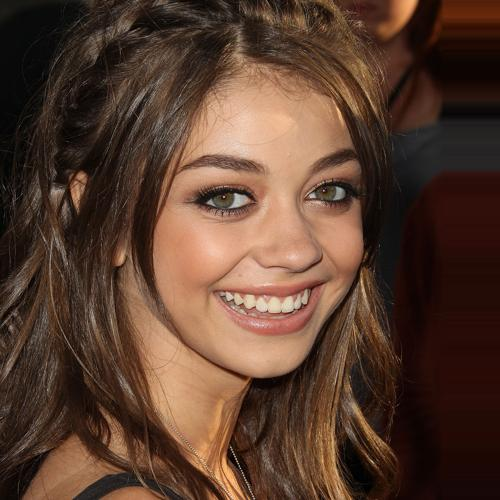

(194285, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.14017
full_path            03/nm0405103_rm1702344960_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.98468
dob_fixed                                      1990-11-24 00:00:00
Name: 194285, dtype: object)


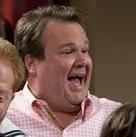

(194286, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1712557568_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194286, dtype: object)


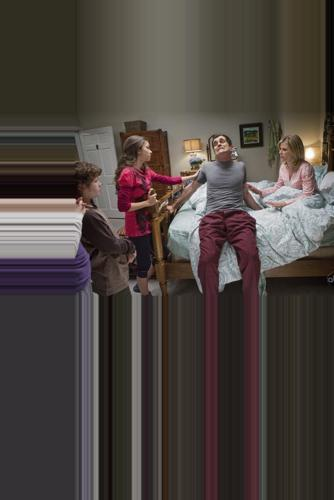

(194287, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.76073
full_path            03/nm0405103_rm1729334784_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194287, dtype: object)


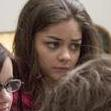

(194288, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.07324
full_path            03/nm0405103_rm1741211136_1990-11-24_2014.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002014
second_face_score                                          3.43531
dob_fixed                                      1990-11-24 00:00:00
Name: 194288, dtype: object)


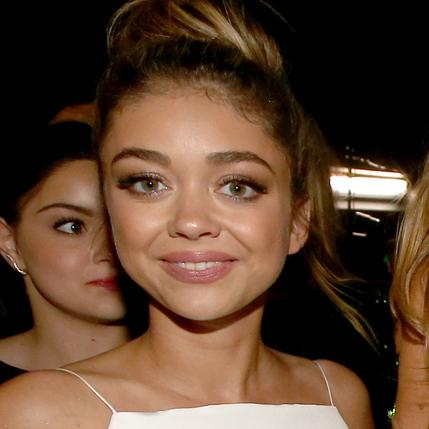

(194289, celeb_id                                                    17210
dob                                                        727161
face_score                                                2.67306
full_path            03/nm0405103_rm175748608_1990-11-24_2011.jpg
gender                                                          0
name                                                 Sarah Hyland
photo_taken                         1970-01-01 00:00:00.000002011
second_face_score                                        0.920543
dob_fixed                                     1990-11-24 00:00:00
Name: 194289, dtype: object)


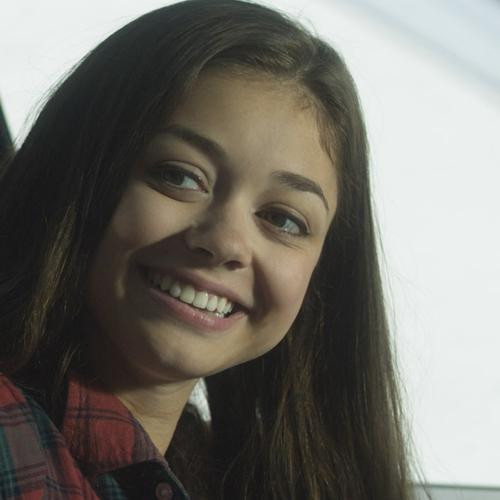

(194290, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1807845120_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194290, dtype: object)


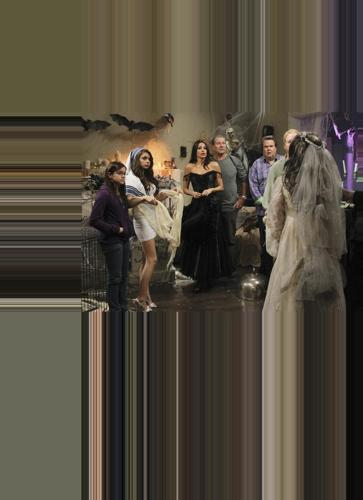

(194291, celeb_id                                                    17210
dob                                                        727161
face_score                                                  4.895
full_path            03/nm0405103_rm180995584_1990-11-24_2014.jpg
gender                                                          0
name                                                 Sarah Hyland
photo_taken                         1970-01-01 00:00:00.000002014
second_face_score                                         4.87597
dob_fixed                                     1990-11-24 00:00:00
Name: 194291, dtype: object)


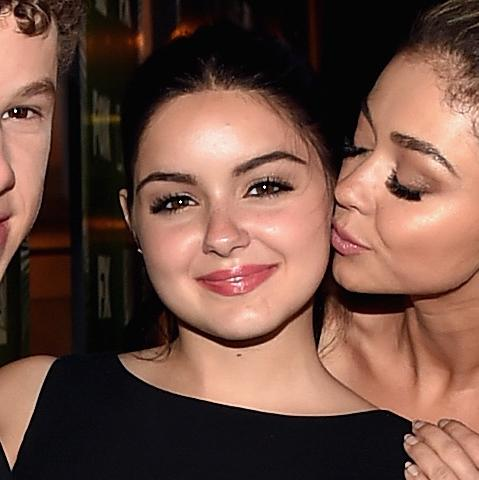

(194292, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.89159
full_path            03/nm0405103_rm1811152384_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.20361
dob_fixed                                      1990-11-24 00:00:00
Name: 194292, dtype: object)


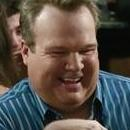

(194293, celeb_id                                                     17210
dob                                                         727161
face_score                                                  1.2497
full_path            03/nm0405103_rm1811542272_1990-11-24_2015.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002015
second_face_score                                         0.845366
dob_fixed                                      1990-11-24 00:00:00
Name: 194293, dtype: object)


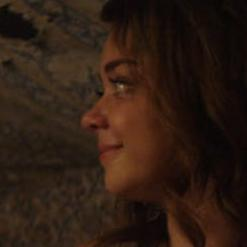

(194294, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.00815
full_path            03/nm0405103_rm1824622336_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194294, dtype: object)


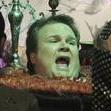

(194295, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.58028
full_path            03/nm0405103_rm1838124288_1990-11-24_2010.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002010
second_face_score                                          1.55674
dob_fixed                                      1990-11-24 00:00:00
Name: 194295, dtype: object)


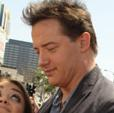

(194296, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.46284
full_path            03/nm0405103_rm1844706816_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.42699
dob_fixed                                      1990-11-24 00:00:00
Name: 194296, dtype: object)


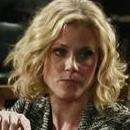

(194297, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.27198
full_path            03/nm0405103_rm1845096704_1990-11-24_2015.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002015
second_face_score                                           1.8575
dob_fixed                                      1990-11-24 00:00:00
Name: 194297, dtype: object)


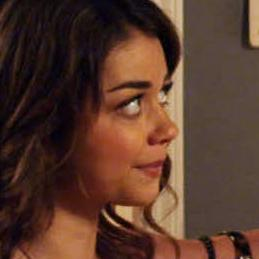

(194298, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.97062
full_path            03/nm0405103_rm1861484032_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.84409
dob_fixed                                      1990-11-24 00:00:00
Name: 194298, dtype: object)


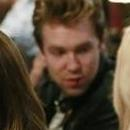

(194299, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.78628
full_path            03/nm0405103_rm1878261248_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194299, dtype: object)


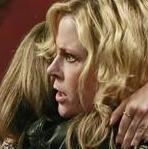

(194300, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.22088
full_path            03/nm0405103_rm1885976576_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                           3.0927
dob_fixed                                      1990-11-24 00:00:00
Name: 194300, dtype: object)


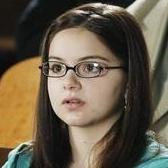

(194301, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm1888061184_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194301, dtype: object)


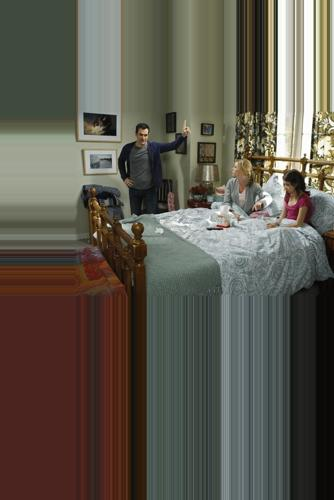

(194302, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.24025
full_path            03/nm0405103_rm1896065280_1990-11-24_2012.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002012
second_face_score                                          1.04737
dob_fixed                                      1990-11-24 00:00:00
Name: 194302, dtype: object)


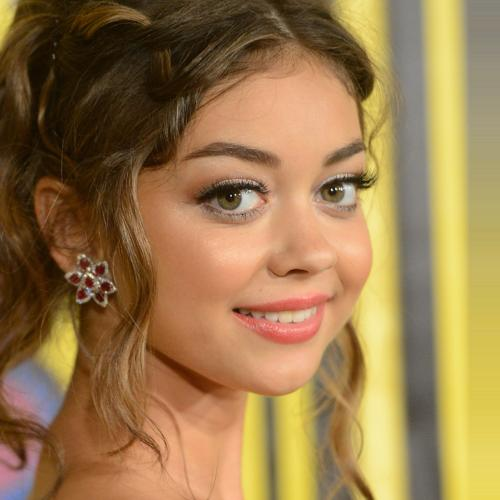

(194303, celeb_id                                                    17210
dob                                                        727161
face_score                                                4.04391
full_path            03/nm0405103_rm197772800_1990-11-24_2014.jpg
gender                                                          0
name                                                 Sarah Hyland
photo_taken                         1970-01-01 00:00:00.000002014
second_face_score                                        0.887485
dob_fixed                                     1990-11-24 00:00:00
Name: 194303, dtype: object)


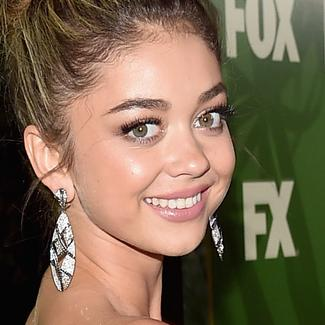

(194304, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.60338
full_path            03/nm0405103_rm2056228096_1990-11-24_2010.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002010
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194304, dtype: object)


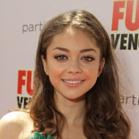

(194305, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.55384
full_path            03/nm0405103_rm2106164992_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194305, dtype: object)


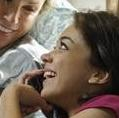

(194306, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.66664
full_path            03/nm0405103_rm2106559744_1990-11-24_2010.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002010
second_face_score                                          3.30204
dob_fixed                                      1990-11-24 00:00:00
Name: 194306, dtype: object)


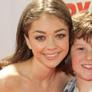

(194307, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.26718
full_path            03/nm0405103_rm2116991488_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194307, dtype: object)


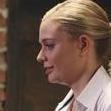

(194308, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.20956
full_path            03/nm0405103_rm2139719424_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.80217
dob_fixed                                      1990-11-24 00:00:00
Name: 194308, dtype: object)


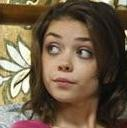

(194309, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm2153614592_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194309, dtype: object)


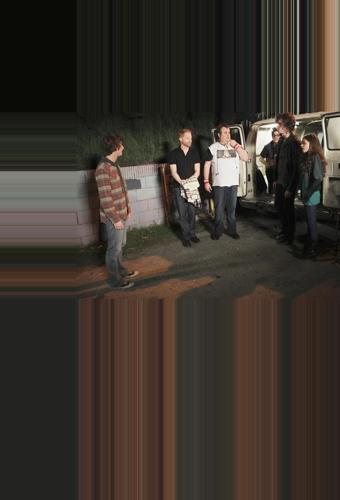

(194310, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.28626
full_path            03/nm0405103_rm2176233216_1990-11-24_2012.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002012
second_face_score                                          4.28611
dob_fixed                                      1990-11-24 00:00:00
Name: 194310, dtype: object)


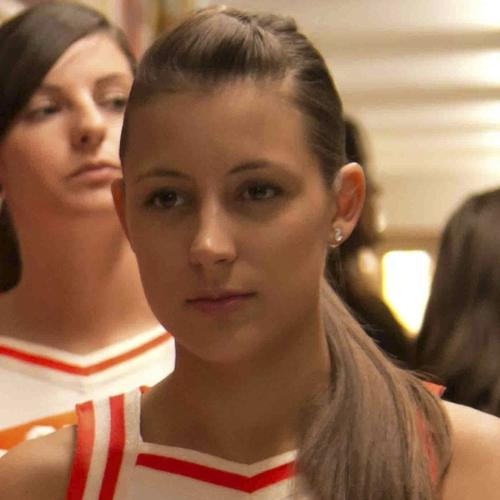

(194311, celeb_id                                                     17210
dob                                                         727161
face_score                                                  3.2844
full_path            03/nm0405103_rm2177811712_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          3.00797
dob_fixed                                      1990-11-24 00:00:00
Name: 194311, dtype: object)


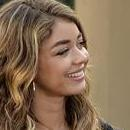

(194312, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.22416
full_path            03/nm0405103_rm2178797312_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.18263
dob_fixed                                      1990-11-24 00:00:00
Name: 194312, dtype: object)


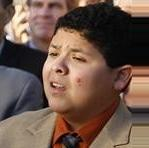

(194313, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.90276
full_path            03/nm0405103_rm2203946240_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.31401
dob_fixed                                      1990-11-24 00:00:00
Name: 194313, dtype: object)


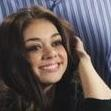

(194314, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.24004
full_path            03/nm0405103_rm2211366144_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          3.03084
dob_fixed                                      1990-11-24 00:00:00
Name: 194314, dtype: object)


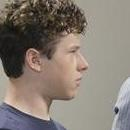

(194315, celeb_id                                                     17210
dob                                                         727161
face_score                                                  1.4402
full_path            03/nm0405103_rm2213920000_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.31771
dob_fixed                                      1990-11-24 00:00:00
Name: 194315, dtype: object)


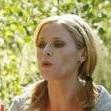

(194316, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.62624
full_path            03/nm0405103_rm2228143360_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.63037
dob_fixed                                      1990-11-24 00:00:00
Name: 194316, dtype: object)


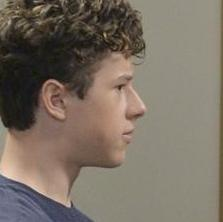

(194317, celeb_id                                                     17210
dob                                                         727161
face_score                                                  2.0788
full_path            03/nm0405103_rm2244920576_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194317, dtype: object)


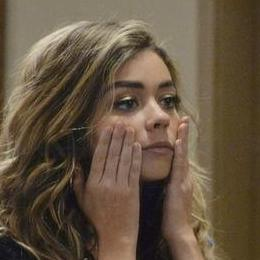

(194318, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm2264251648_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194318, dtype: object)


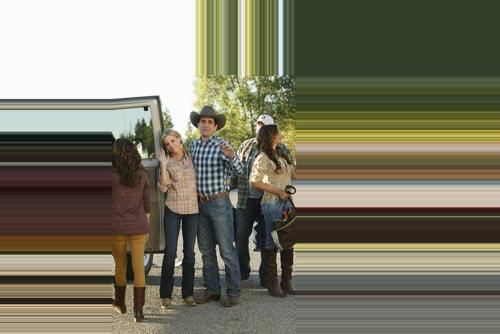

(194319, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.14237
full_path            03/nm0405103_rm2296626176_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194319, dtype: object)


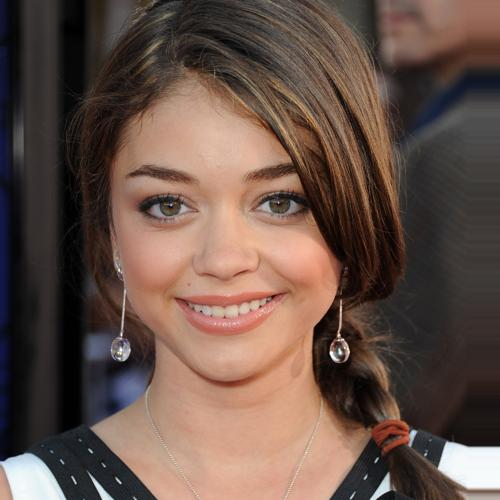

(194320, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.97498
full_path            03/nm0405103_rm2346569472_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.06264
dob_fixed                                      1990-11-24 00:00:00
Name: 194320, dtype: object)


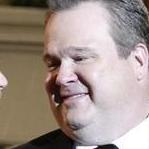

(194321, celeb_id                                                     17210
dob                                                         727161
face_score                                                 2.51627
full_path            03/nm0405103_rm2379138304_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.79472
dob_fixed                                      1990-11-24 00:00:00
Name: 194321, dtype: object)


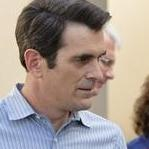

(194322, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.49275
full_path            03/nm0405103_rm2396901120_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          3.17825
dob_fixed                                      1990-11-24 00:00:00
Name: 194322, dtype: object)


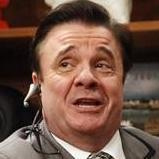

(194323, celeb_id                                                     17210
dob                                                         727161
face_score                                                0.800268
full_path            03/nm0405103_rm2411114240_1990-11-24_2012.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002012
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194323, dtype: object)


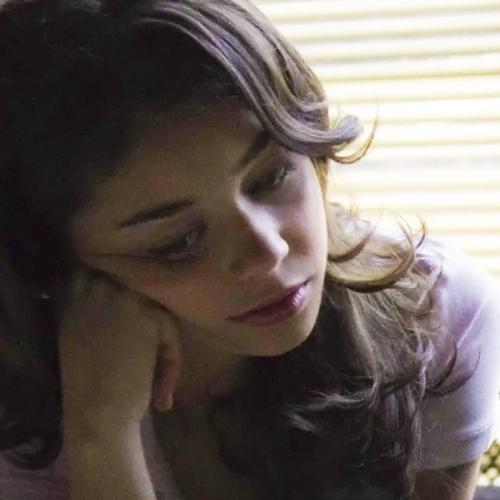

(194324, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm2427434496_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194324, dtype: object)


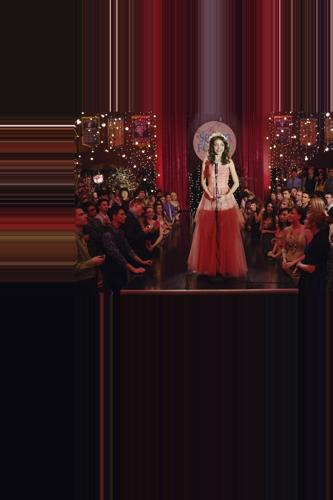

(194325, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.15584
full_path            03/nm0405103_rm2444211712_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194325, dtype: object)


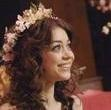

(194326, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.70922
full_path            03/nm0405103_rm2460988928_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                         0.746323
dob_fixed                                      1990-11-24 00:00:00
Name: 194326, dtype: object)


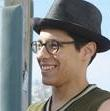

(194327, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.15563
full_path            03/nm0405103_rm2477766144_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194327, dtype: object)


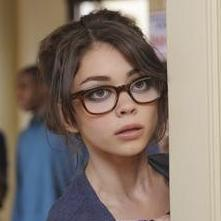

(194328, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm2494543360_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194328, dtype: object)


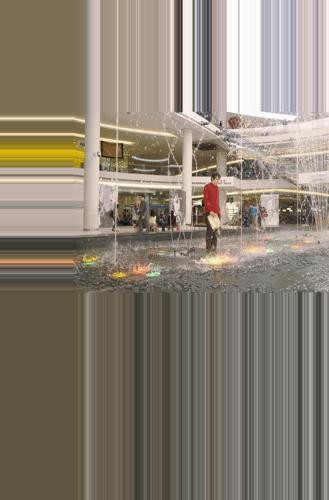

(194329, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.74278
full_path            03/nm0405103_rm2511320576_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                          1.17039
dob_fixed                                      1990-11-24 00:00:00
Name: 194329, dtype: object)


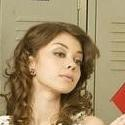

(194330, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.64339
full_path            03/nm0405103_rm2517477632_1990-11-24_2012.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002012
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194330, dtype: object)


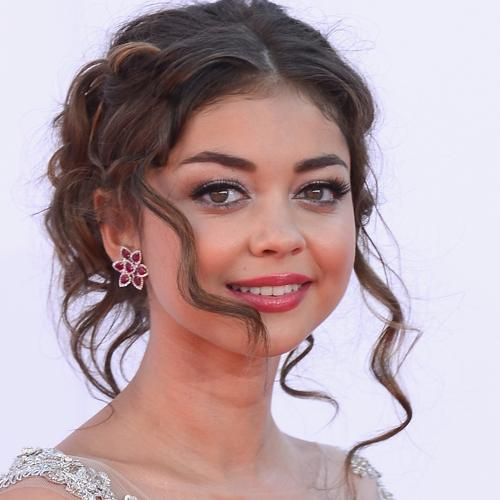

(194331, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.96384
full_path            03/nm0405103_rm2551623680_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          1.22258
dob_fixed                                      1990-11-24 00:00:00
Name: 194331, dtype: object)


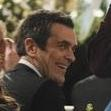

(194332, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.29301
full_path            03/nm0405103_rm2551809536_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                         0.900583
dob_fixed                                      1990-11-24 00:00:00
Name: 194332, dtype: object)


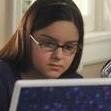

(194333, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.35651
full_path            03/nm0405103_rm2588989440_1990-11-24_2014.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002014
second_face_score                                           3.7112
dob_fixed                                      1990-11-24 00:00:00
Name: 194333, dtype: object)


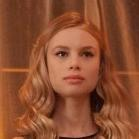

(194334, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.32045
full_path            03/nm0405103_rm2595206656_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                          1.16638
dob_fixed                                      1990-11-24 00:00:00
Name: 194334, dtype: object)


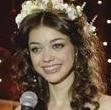

(194335, celeb_id                                                     17210
dob                                                         727161
face_score                                                 3.51759
full_path            03/nm0405103_rm2602141184_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                          2.72103
dob_fixed                                      1990-11-24 00:00:00
Name: 194335, dtype: object)


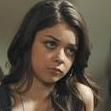

(194336, celeb_id                                                     17210
dob                                                         727161
face_score                                                 5.86754
full_path            03/nm0405103_rm2611598080_1990-11-24_2013.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002013
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194336, dtype: object)


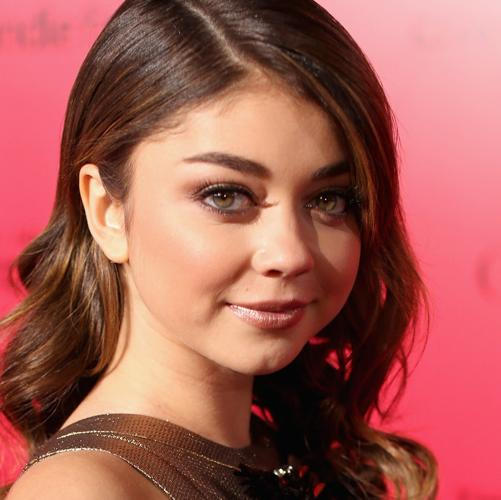

(194337, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.34838
full_path            03/nm0405103_rm2611983872_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194337, dtype: object)


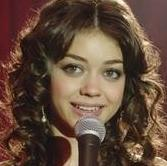

(194338, celeb_id                                                     17210
dob                                                         727161
face_score                                                 4.52297
full_path            03/nm0405103_rm2616706560_1990-11-24_2014.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002014
second_face_score                                          3.60872
dob_fixed                                      1990-11-24 00:00:00
Name: 194338, dtype: object)


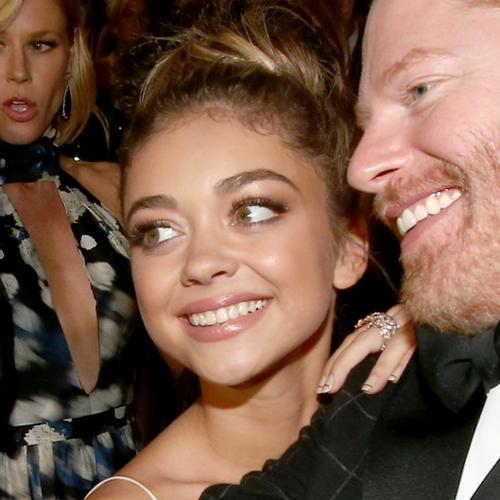

(194339, celeb_id                                                     17210
dob                                                         727161
face_score                                                    -inf
full_path            03/nm0405103_rm2628761088_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194339, dtype: object)


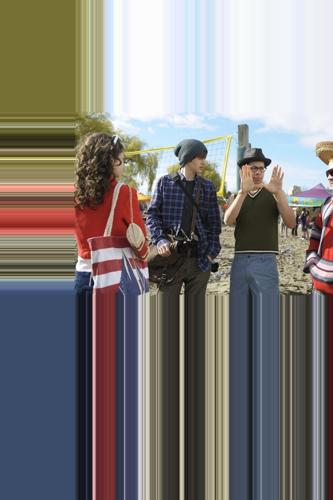

(194340, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.67321
full_path            03/nm0405103_rm2644413952_1990-11-24_2009.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002009
second_face_score                                         0.764208
dob_fixed                                      1990-11-24 00:00:00
Name: 194340, dtype: object)


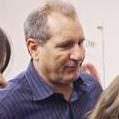

(194341, celeb_id                                                     17210
dob                                                         727161
face_score                                                 1.84565
full_path            03/nm0405103_rm2645538304_1990-11-24_2011.jpg
gender                                                           0
name                                                  Sarah Hyland
photo_taken                          1970-01-01 00:00:00.000002011
second_face_score                                              NaN
dob_fixed                                      1990-11-24 00:00:00
Name: 194341, dtype: object)


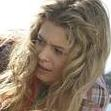

In [19]:
for r in df[df.name == "Sarah Hyland"].head(100).iterrows():
    print(r)
    display(show_index_imdb(r[0]))